# CPTox21: Conformal prediction and exchangeability in in vitro toxicological datasets

This notebooks demonstrates the main workflow to obtain the results for the manuscript ...

### Import libraries and modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.svm import SVC
from nonconformist.nc import NcFactory, MarginErrFunc

In [3]:
from cptox21 import (
    define_path, load_signatures_files, StratifiedRatioSampler,CrossValidationSampler,
    KnownIndicesSampler, InductiveConformalPredictor,
    AggregatedConformalPredictor, CPTox21AggregatedConformalPredictor, 
    CPTox21CrossValidator, CPTox21TrainUpdateCrossValidator
)

### Define paths and parameters

In [4]:
data_signatures_path = "../data/data_signatures/"
# data_models_path = args["data_models_path"]
data_statistics_path = "../data/data_statistics/"

In [5]:
endpoint = "NR_ER"

In [6]:
# CP
n_folds_acp = 2

#### Build ICP classifier

In [7]:
clf = SVC(kernel='rbf', C=50, gamma=0.002, probability=True)
error_function = MarginErrFunc()
normaliser_model = None
nc = NcFactory.create_nc(
    clf, err_func=error_function
)
icp = InductiveConformalPredictor(
        nc_function=nc, condition=(lambda instance: instance[1])
    )  # Mondrian as (default) condition)

#### Build ACP for main framework and for train_update

In [8]:
acp = CPTox21AggregatedConformalPredictor(
        predictor=icp, sampler=StratifiedRatioSampler(n_folds=n_folds_acp),
        aggregation_func=np.median
    )

#### Load data

In [9]:
datasets = ["train", "test", "score"]
train_path = define_path(endpoint=endpoint, data=datasets[0], signatures_path=data_signatures_path)
test_path = define_path(endpoint=endpoint, data=datasets[1], signatures_path=data_signatures_path)
score_path = define_path(endpoint=endpoint, data=datasets[2], signatures_path=data_signatures_path)

X_train, y_train, X_test, y_test, X_score, y_score = load_signatures_files(train_path, test_path, score_path)
# X_train = X_train[:500]
# y_train = y_train[:500]

#### Define crossvalidator, which does all acp experiments except for train_update

In [10]:
cross_validator = CPTox21CrossValidator(
            acp, cv_splitter=CrossValidationSampler(),
            score_splitter=StratifiedRatioSampler(test_ratio=0.5)
        )

#### Crossvalidate

In [11]:
cross_validator.cross_validate(
            steps=10,
            endpoint=endpoint,
            X_train=X_train,
            y_train=y_train,
            X_update=X_test,
            y_update=y_test,
            X_score=X_score,
            y_score=y_score,
        )

len score 245 245


<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.54732972 0.23387861]
 [0.93837149 0.03139152]
 [0.53043337 0.2401428 ]
 ...
 [0.7435561  0.13300185]
 [0.90327285 0.05879658]
 [0.76718295 0.12389004]] <class 'numpy.ndarray'>
(1439, 3)
(1439, 3)
[[2.34582202e-01 4.00530071e-01]
 [5.19391394e-01 2.35822968e-01]
 [5.58745363e-02 5.70369173e-01]
 [7.25308282e-01 1.39740297e-01]
 [7.82417536e-01 1.34975341e-01]
 [3.47826715e-02 6.28640605e-01]
 [1.20760737e-01 4.82577420e-01]
 [4.62950050e-01 2.67130264e-01]
 [1.43229770e-01 4.82448354e-01]
 [5.54521310e-01 2.38094706e-01]
 [9.98261127e-02 5.11105367e-01]
 [5.59303499e-01 2.14888459e-01]
 [2.84391974e-01 3.89500817e-01]
 [8.50922454e-01 8.48766586e-02]
 [7.25570779e-02 5.47717218e-01]
 [1.24809846e-02 7.50865524e-01]
 [7.50099115e-01 1.29127178e-01]
 [3.65202782e-01 3.45745059e-01]
 [3.06069411e-01 3.57675409e-01]
 [4.22938982e-01 2.88612096e-01]
 [7.52280364e-01 1.20835158e-01]
 [5.22601624e-01 2.57798505e-01]
 [6.31919226e-01 1.90754839e-01]
 [7.45742926e-01 1.29163389e-01]
 [7.1179

[[0.36394539 0.42375499]
 [0.57564988 0.28976608]
 [0.11797538 0.69696361]
 [0.78762512 0.1814846 ]
 [0.82470862 0.11577767]
 [0.08269045 0.75512377]
 [0.20624003 0.54965469]
 [0.55704688 0.34726824]
 [0.25207528 0.58466001]
 [0.61543223 0.23379543]
 [0.17304263 0.61538425]
 [0.61892223 0.25216353]
 [0.35332486 0.49482374]
 [0.87264813 0.08867031]
 [0.15351413 0.68160439]
 [0.01580332 0.93917462]
 [0.80602361 0.15703331]
 [0.4472427  0.29141656]
 [0.40973344 0.39224846]
 [0.51097591 0.37498225]
 [0.77469493 0.14864013]
 [0.60491346 0.2184822 ]
 [0.67841195 0.19558978]
 [0.78467415 0.18056383]
 [0.76531192 0.15657476]
 [0.77637063 0.17513023]
 [0.45608166 0.2880087 ]
 [0.69203178 0.21160032]
 [0.5006137  0.34988221]
 [0.70754492 0.19886233]
 [0.59834265 0.2408467 ]
 [0.96704334 0.02571093]
 [0.50513684 0.37496378]
 [0.61555769 0.2799584 ]
 [0.32939801 0.43714086]
 [0.29325272 0.49049929]
 [0.43060846 0.34909059]
 [0.8261465  0.13680684]
 [0.92457747 0.09236083]
 [0.19505558 0.63239264]


len score 245 245


<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.21175811 0.37258773]
 [0.57226867 0.16166117]
 [0.30681993 0.30340976]
 ...
 [0.1053067  0.48546154]
 [0.36830491 0.25314076]
 [0.27966317 0.32913618]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[4.51855390e-01 2.75156092e-01]
 [1.94178690e-01 3.90863435e-01]
 [5.20400333e-02 5.46259230e-01]
 [6.57199289e-01 1.16190944e-01]
 [6.54605686e-01 1.30074312e-01]
 [3.15770600e-02 5.96185154e-01]
 [1.91567464e-01 3.79138522e-01]
 [7.14742310e-01 1.06642350e-01]
 [4.27920716e-01 2.35197579e-01]
 [5.42685451e-01 1.59886589e-01]
 [9.49838266e-02 4.70653702e-01]
 [7.35498576e-01 9.71296372e-02]
 [9.67936795e-02 4.63837121e-01]
 [3.06614537e-02 6.02734152e-01]
 [2.85057326e-01 3.24909810e-01]
 [1.87274620e-02 6.63491707e-01]
 [8.97288879e-01 5.33643142e-02]
 [2.38683887e-01 3.49726220e-01]
 [2.97442243e-01 3.09589291e-01]
 [1.17405843e-01 4.37212531e-01]
 [8.61865528e-01 5.62139484e-02]
 [6.90519887e-01 1.12286084e-01]
 [6.69726088e-01 1.17622190e-01]
 [6.45103626e-01 1.22391654e-01]
 [5.7849

[[0.48114215 0.31562312]
 [0.33009157 0.37163752]
 [0.07143127 0.76363695]
 [0.70153843 0.20364315]
 [0.69887494 0.18898139]
 [0.04169638 0.84599844]
 [0.33985262 0.41278243]
 [0.73694936 0.2029067 ]
 [0.52670703 0.32709186]
 [0.61494558 0.22304285]
 [0.18871649 0.58217114]
 [0.74321504 0.14229202]
 [0.1905575  0.55812366]
 [0.03932406 0.83255122]
 [0.36763613 0.39080502]
 [0.01427502 0.89212917]
 [0.89292663 0.10307292]
 [0.39355088 0.34762119]
 [0.42430578 0.33304454]
 [0.22506478 0.45135267]
 [0.85314007 0.10180313]
 [0.72169029 0.19251601]
 [0.70314309 0.19330413]
 [0.68421962 0.17083689]
 [0.64202277 0.22182002]
 [0.84204025 0.10146843]
 [0.74981369 0.14138457]
 [0.71202956 0.19292044]
 [0.66587599 0.20028473]
 [0.74296999 0.12831661]
 [0.90064092 0.11000281]
 [0.98872459 0.01650562]
 [0.60035939 0.22168081]
 [0.58751871 0.23924399]
 [0.80166828 0.12283366]
 [0.09937793 0.69731627]
 [0.55936463 0.28310017]
 [0.78199773 0.13117417]
 [0.91773708 0.10705354]
 [0.10154985 0.67216467]


len score 245 245


<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.84299578 0.06495376]
 [0.93670775 0.03721255]
 [0.95822151 0.03149861]
 ...
 [0.66781203 0.16432757]
 [0.70560694 0.12173623]
 [0.31170741 0.32564837]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[4.57017479e-01 2.39086147e-01]
 [3.17171309e-01 3.29851816e-01]
 [5.60130847e-02 5.67384250e-01]
 [1.69476026e-01 4.21781259e-01]
 [5.01923981e-01 2.32837266e-01]
 [3.57302033e-02 6.33459543e-01]
 [3.24968199e-01 3.41350490e-01]
 [2.16841434e-01 3.75937602e-01]
 [2.00714409e-01 4.29377818e-01]
 [6.43607541e-01 1.50974009e-01]
 [5.91177575e-01 1.76917676e-01]
 [8.63530510e-01 6.19214423e-02]
 [3.36914601e-01 3.12271453e-01]
 [3.98198204e-02 6.25301359e-01]
 [3.01538620e-01 3.64058047e-01]
 [1.95150080e-02 6.79613115e-01]
 [8.91461102e-01 5.16311673e-02]
 [4.80711905e-01 2.40814044e-01]
 [4.95159125e-01 2.31189424e-01]
 [5.78423049e-01 1.86846746e-01]
 [8.80869936e-01 5.27209278e-02]
 [7.14865412e-01 1.28898225e-01]
 [5.26263855e-01 2.25491255e-01]
 [5.93931393e-01 1.75447459e-01]
 [7.2361

[[3.96866373e-01 2.90255526e-01]
 [2.70187565e-02 6.56846138e-01]
 [4.23863681e-01 2.88013967e-01]
 [5.55929662e-01 2.04200051e-01]
 [5.44843033e-01 2.09935562e-01]
 [9.43158453e-02 5.14690187e-01]
 [5.15398287e-01 2.03740477e-01]
 [8.97716320e-01 5.02568067e-02]
 [7.54792675e-01 9.74013948e-02]
 [4.64375100e-01 2.46373191e-01]
 [5.59047645e-01 1.97347751e-01]
 [2.88608429e-01 4.49348555e-01]
 [1.53192851e-01 4.46109141e-01]
 [7.47859231e-02 5.40900911e-01]
 [3.65601718e-02 6.29009607e-01]
 [3.35165035e-01 3.16823423e-01]
 [9.32743375e-01 4.01207800e-02]
 [8.02709996e-01 7.90138049e-02]
 [5.36037173e-01 1.99755373e-01]
 [1.86647789e-01 4.39974048e-01]
 [1.18900976e-01 4.97360149e-01]
 [1.71490622e-02 7.05056830e-01]
 [6.67564183e-01 1.50186058e-01]
 [3.41554883e-01 3.01662996e-01]
 [1.39158396e-01 5.66322853e-01]
 [1.46613743e-01 4.56434008e-01]
 [8.59623596e-01 5.05927208e-02]
 [6.79762756e-01 1.28672368e-01]
 [2.91662198e-01 3.66899847e-01]
 [4.86697134e-01 2.17561748e-01]
 [4.702737

[[0.29677547 0.32808519]
 [0.15686613 0.44896851]
 [0.37930649 0.31473969]
 [0.00190082 0.98463402]
 [0.44404545 0.26346746]
 [0.47602936 0.26498762]
 [0.25670114 0.36753479]
 [0.79279828 0.09410153]
 [0.35635301 0.34575129]
 [0.33810389 0.32230904]
 [0.16349949 0.40780628]
 [0.17185001 0.41437448]
 [0.1048239  0.56591004]
 [0.44566236 0.25712453]
 [0.06537802 0.64059474]
 [0.58226921 0.20312179]
 [0.27121075 0.34256502]
 [0.04254787 0.73304289]
 [0.55058514 0.24950579]
 [0.08345638 0.64029489]
 [0.28938965 0.39346888]
 [0.38521708 0.40806972]
 [0.42394234 0.30954947]
 [0.11912091 0.55562626]
 [0.45495007 0.24825108]
 [0.42407979 0.27322197]
 [0.1083319  0.57301914]
 [0.56240467 0.23727356]
 [0.83882725 0.09784689]
 [0.47174407 0.25493345]
 [0.87009272 0.08616586]
 [0.16971389 0.43470172]
 [0.52675362 0.2231066 ]
 [0.67473195 0.14591636]
 [0.55812804 0.18517398]
 [0.53653874 0.2426956 ]
 [0.24005996 0.36613885]
 [0.76338905 0.09375022]
 [0.12841435 0.51329831]
 [0.09097994 0.58888141]


<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.36180674 0.31229809]
 [0.41953649 0.37605319]
 [0.34561257 0.31756392]
 ...
 [0.50040255 0.22424158]
 [0.11747369 0.46433835]
 [0.68357997 0.15308182]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[1.74524276e-01 4.15367171e-01]
 [5.59423003e-01 2.06594913e-01]
 [3.13575850e-01 3.37808141e-01]
 [2.70935028e-01 3.97125033e-01]
 [7.18677389e-01 1.38899061e-01]
 [4.02343963e-02 5.84805950e-01]
 [2.07298935e-01 3.95264181e-01]
 [6.21194562e-01 1.88891288e-01]
 [5.46851107e-01 2.12690687e-01]
 [6.23560025e-01 1.87465799e-01]
 [1.21069468e-01 4.50366403e-01]
 [5.82498443e-01 1.94109757e-01]
 [1.25008424e-01 4.56716787e-01]
 [4.35894674e-02 5.74144325e-01]
 [9.75273847e-02 5.11548458e-01]
 [2.39281914e-02 6.56595611e-01]
 [9.06698032e-01 4.83655396e-02]
 [4.69520295e-01 2.43513093e-01]
 [1.84852658e-01 4.10774032e-01]
 [5.83970334e-01 2.05135204e-01]
 [7.96347886e-01 1.13296505e-01]
 [4.21999850e-01 2.94254341e-01]
 [3.13899822e-01 3.34031841e-01]
 [2.16170314e-01 3.97479686e-01]
 [7.1324

[[3.32402396e-01 4.52962680e-01]
 [6.15182353e-01 2.35565467e-01]
 [4.41850126e-01 3.83284742e-01]
 [3.26690779e-01 5.14858604e-01]
 [7.63867476e-01 1.48688724e-01]
 [7.25782269e-02 7.74647175e-01]
 [3.69811957e-01 4.71464078e-01]
 [6.81740379e-01 2.02340893e-01]
 [6.19196096e-01 2.82949324e-01]
 [7.08994016e-01 1.77713903e-01]
 [2.51298416e-01 5.13483678e-01]
 [6.34603520e-01 2.46434571e-01]
 [2.63083971e-01 5.00793595e-01]
 [8.55324676e-02 7.57064672e-01]
 [1.98274343e-01 6.44022589e-01]
 [2.89589427e-02 9.18047836e-01]
 [9.34155706e-01 1.99195789e-02]
 [5.57498339e-01 2.97161545e-01]
 [3.47831898e-01 4.74297308e-01]
 [6.48477638e-01 2.36152360e-01]
 [8.43628048e-01 1.00135025e-01]
 [5.44086814e-01 3.54315008e-01]
 [4.36683430e-01 3.79769959e-01]
 [3.76875646e-01 3.87174543e-01]
 [7.58354008e-01 1.63548134e-01]
 [8.19756593e-01 1.06913876e-01]
 [6.68966926e-01 2.18994366e-01]
 [6.69775398e-01 2.10094001e-01]
 [6.42065544e-01 2.42700764e-01]
 [7.22776826e-01 1.77465133e-01]
 [6.842575

len score 245 245


<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.22652391 0.50131186]
 [0.01606115 0.6988098 ]
 [0.38744396 0.3140175 ]
 ...
 [0.39704036 0.30095767]
 [0.39687213 0.30228562]
 [0.17936277 0.42468562]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[2.16657228e-01 3.90829658e-01]
 [3.63509941e-01 2.94710593e-01]
 [7.55724948e-02 5.40105023e-01]
 [5.08652926e-01 2.45738100e-01]
 [4.08327170e-01 2.86951044e-01]
 [3.02089785e-02 6.43458809e-01]
 [1.47916840e-01 4.60637634e-01]
 [1.78038426e-01 4.17421075e-01]
 [2.82615145e-01 3.83037043e-01]
 [2.92560436e-01 3.36967201e-01]
 [8.03123526e-02 5.37794335e-01]
 [7.54133682e-01 9.61707503e-02]
 [1.39324353e-01 4.61510801e-01]
 [3.18503952e-02 6.25311660e-01]
 [2.91066985e-01 3.45632329e-01]
 [1.61494302e-02 6.91502657e-01]
 [7.74080316e-01 8.64293137e-02]
 [3.62092293e-01 3.15378070e-01]
 [1.83255970e-01 4.02041499e-01]
 [4.95817648e-01 2.17233788e-01]
 [7.43011007e-01 9.33866709e-02]
 [3.80518015e-01 2.94285702e-01]
 [1.52654154e-01 4.36119071e-01]
 [2.03345264e-01 3.95807985e-01]
 [6.1280

[[1.92958909e-01 4.27972989e-01]
 [2.61803662e-02 6.57889881e-01]
 [3.69865593e-01 2.87467480e-01]
 [3.50263970e-01 2.94272778e-01]
 [3.96148797e-01 2.68574394e-01]
 [1.09942745e-01 4.97341852e-01]
 [7.87290002e-01 7.79686320e-02]
 [9.39988545e-01 3.64999319e-02]
 [7.90353658e-01 8.06145557e-02]
 [5.50789171e-01 1.95393697e-01]
 [3.62100933e-01 2.82668685e-01]
 [5.14475849e-02 5.83666548e-01]
 [5.77786416e-02 5.85015034e-01]
 [5.30635458e-02 5.92845060e-01]
 [9.24775985e-02 5.13179081e-01]
 [7.26064430e-01 9.74778030e-02]
 [9.27015026e-01 4.81861475e-02]
 [7.27167917e-01 1.10188032e-01]
 [6.64825917e-01 1.33035313e-01]
 [5.60433850e-01 2.17673177e-01]
 [9.39046911e-02 5.21418983e-01]
 [2.78532648e-02 6.46488027e-01]
 [8.60702407e-01 6.09620082e-02]
 [9.55663041e-02 5.08989691e-01]
 [1.16847742e-01 4.79892055e-01]
 [1.81610850e-01 4.02443392e-01]
 [8.78030884e-01 4.81583943e-02]
 [3.88760554e-01 2.76027091e-01]
 [7.24644838e-01 1.05971732e-01]
 [6.43770892e-01 1.45711468e-01]
 [1.837574

[[2.81273750e-01 4.03219102e-01]
 [6.48780545e-01 1.65722855e-01]
 [4.79580452e-01 2.80602095e-01]
 [3.40275910e-01 3.33163067e-01]
 [8.28123435e-01 8.31590766e-02]
 [3.42721103e-01 3.82709794e-01]
 [6.90445914e-01 1.09290443e-01]
 [3.13917285e-01 4.05797890e-01]
 [7.56422908e-01 8.39055485e-02]
 [2.98779547e-01 3.52683911e-01]
 [3.75590063e-01 3.25343016e-01]
 [6.15547671e-01 1.27177974e-01]
 [3.34689579e-01 3.73094572e-01]
 [5.57111266e-01 1.72367174e-01]
 [8.15231535e-01 5.19775367e-02]
 [1.89140567e-01 4.43432113e-01]
 [5.98822436e-01 1.24836685e-01]
 [1.89383745e-01 4.16456804e-01]
 [8.83447881e-01 5.38159084e-02]
 [4.07585256e-01 3.20751132e-01]
 [8.36497863e-01 4.65077662e-02]
 [9.99029430e-01 2.00666914e-02]
 [7.92494699e-01 6.66460512e-02]
 [4.02522109e-01 3.42759205e-01]
 [7.87736709e-01 8.53530251e-02]
 [8.31326209e-01 6.29487537e-02]
 [8.42275294e-01 6.10859735e-02]
 [2.52815334e-02 8.09209685e-01]
 [8.00183258e-02 6.83023337e-01]
 [1.55936408e-01 4.76130421e-01]
 [7.560453

(    validity  validity_0  validity_1  error_rate  error_rate_0  error_rate_1  \
 0      1.000       1.000       1.000       0.000         0.000         0.000   
 1      0.926       0.921       0.956       0.074         0.079         0.044   
 2      0.839       0.834       0.878       0.161         0.166         0.122   
 3      0.757       0.752       0.796       0.243         0.248         0.204   
 4      0.614       0.608       0.657       0.386         0.392         0.343   
 5      0.501       0.492       0.564       0.499         0.508         0.436   
 6      0.377       0.367       0.448       0.623         0.633         0.552   
 7      0.259       0.246       0.348       0.741         0.754         0.652   
 8      0.151       0.141       0.215       0.849         0.859         0.785   
 9      0.065       0.060       0.099       0.935         0.940         0.901   
 10     0.000       0.000       0.000       1.000         1.000         1.000   
 11     1.000       1.000   

#### Get splits from crossvalidator, so that exactly the same splits can be used for train_update

In [12]:
train_index, test_index = cross_validator.train_indices, cross_validator.test_indices

known_indices_sampler = KnownIndicesSampler(known_train=train_index, known_test=test_index)



#### Define ACP for train_update

In [13]:
train_update_acp = AggregatedConformalPredictor(
        predictor=icp, sampler=StratifiedRatioSampler(n_folds=n_folds_acp),
        aggregation_func=np.median
    )

#### Define train_update crossvalidator using same splits as before and crossvalidate

In [14]:
train_update_cross_validator = CPTox21TrainUpdateCrossValidator(train_update_acp, cv_splitter=known_indices_sampler)

train_update_cross_validator.cross_validate(steps=10,
                                           endpoint=endpoint,
                                           X_train=X_train,
                                           y_train=y_train,
                                           X_update=X_test,
                                           y_update=y_test,
                                           X_score=X_score,
                                           y_score=y_score,
                                           class_wise_evaluation=False)

<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.56879655 0.2047603 ]
 [0.88156907 0.05942805]
 [0.86442798 0.07794511]
 ...
 [0.63686437 0.16992947]
 [0.79359071 0.10885666]
 [0.67785918 0.15911285]] <class 'numpy.ndarray'>
(1439, 3)
(1439, 3)
[[3.42176988e-01 3.20329733e-01]
 [2.46296988e-01 3.88904766e-01]
 [3.51052117e-02 6.07354970e-01]
 [5.66776556e-01 2.09721549e-01]
 [9.66848825e-01 2.15689465e-02]
 [3.33671393e-02 5.98430772e-01]
 [1.34200827e-01 4.58652273e-01]
 [5.93546098e-01 1.88153341e-01]
 [8.23405466e-02 4.99671612e-01]
 [5.27468045e-01 2.37122156e-01]
 [8.89284350e-02 4.92015841e-01]
 [4.97649887e-01 2.63104271e-01]
 [1.95657404e-01 3.89677950e-01]
 [9.09484147e-01 4.99689341e-02]
 [1.41478948e-01 4.38417506e-01]
 [1.74857171e-02 7.40295280e-01]
 [7.35163900e-01 1.42189887e-01]
 [1.70035869e-01 4.74029387e-01]
 [2.23147383e-01 3.81282558e-01]
 [4.70395490e-01 2.52812973e-01]
 [8.20723128e-01 9.49094334e-02]
 [4.75898506e-01 2.65809620e-01]
 [6.53094909e-01 1.68696651e-01]
 [6.94828038e-01 1.58137858e-01]
 [7.6849

<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.10146511 0.49573578]
 [0.79217294 0.0801798 ]
 [0.12740185 0.4600461 ]
 ...
 [0.12736716 0.47654998]
 [0.37122922 0.2858499 ]
 [0.1109215  0.47012858]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[1.27909461e-01 4.48670048e-01]
 [3.27733296e-01 3.14157171e-01]
 [1.14169964e-01 4.70555723e-01]
 [5.86380079e-01 1.80224248e-01]
 [7.68595161e-01 8.88712448e-02]
 [4.05696747e-02 5.69323970e-01]
 [2.25712457e-01 3.65987765e-01]
 [3.78722479e-01 2.72045863e-01]
 [3.13944864e-01 3.13250506e-01]
 [5.04268427e-01 2.14306253e-01]
 [1.73734438e-01 4.14551250e-01]
 [7.31043165e-01 9.46131989e-02]
 [7.33231025e-02 5.16212085e-01]
 [5.72091741e-01 1.94316292e-01]
 [7.13862923e-02 5.20376815e-01]
 [2.21193129e-02 6.60210627e-01]
 [8.69708456e-01 5.42146985e-02]
 [3.94310473e-01 2.80937806e-01]
 [2.39436736e-01 3.65506596e-01]
 [3.19768435e-01 3.58621274e-01]
 [9.15646469e-01 2.89566078e-02]
 [5.32821636e-01 2.01819652e-01]
 [5.99836167e-01 1.65321780e-01]
 [5.97194497e-01 1.68409469e-01]
 [9.4752

<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.49278487 0.25120893]
 [0.97839464 0.02547869]
 [0.99021132 0.02054663]
 ...
 [0.27990962 0.33434527]
 [0.66482923 0.13757303]
 [0.33579143 0.33573228]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[0.28892298 0.33139572]
 [0.35189913 0.2766443 ]
 [0.02819599 0.63290749]
 [0.35702753 0.27205149]
 [0.82554523 0.09345976]
 [0.01417574 0.69052582]
 [0.1282894  0.42603276]
 [0.16531107 0.39980438]
 [0.34308446 0.28753765]
 [0.60680914 0.20572482]
 [0.45888149 0.25771084]
 [0.85518517 0.07436737]
 [0.10038735 0.46987597]
 [0.46323159 0.26072121]
 [0.21115045 0.36463962]
 [0.02145179 0.67116711]
 [0.82869356 0.07478429]
 [0.3134567  0.32181495]
 [0.09378325 0.47226721]
 [0.51193458 0.24182235]
 [0.86222032 0.07236505]
 [0.39669931 0.25005824]
 [0.37873344 0.28858649]
 [0.46655536 0.23626594]
 [0.43621936 0.23154365]
 [0.61909699 0.15520011]
 [0.52984576 0.19429044]
 [0.49119842 0.22656544]
 [0.57903537 0.17637002]
 [0.5853106  0.17337318]
 [0.62037667 0.1523888 ]
 [0.88060239 0.06488846]


<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.32659271 0.31830771]
 [0.01802382 0.66153588]
 [0.34003056 0.29955048]
 ...
 [0.5147996  0.19323783]
 [0.10675182 0.45810646]
 [0.69023632 0.12893186]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[5.64388792e-02 5.35710107e-01]
 [3.83394089e-01 2.63885078e-01]
 [1.47039244e-01 4.17632355e-01]
 [5.96278998e-01 1.88443778e-01]
 [6.10284062e-01 1.84623447e-01]
 [3.60204114e-02 5.85397661e-01]
 [2.04934637e-01 3.89457456e-01]
 [8.41759693e-01 7.53178952e-02]
 [4.82810145e-01 2.36731048e-01]
 [5.21495707e-01 2.22461498e-01]
 [2.61019677e-01 3.36565476e-01]
 [7.86061207e-01 9.68488032e-02]
 [1.24755337e-01 4.38380520e-01]
 [8.71023296e-01 5.96888595e-02]
 [1.08437185e-01 4.65562197e-01]
 [1.57928254e-02 6.79208319e-01]
 [9.37283462e-01 3.36650510e-02]
 [4.55690362e-01 2.29828512e-01]
 [1.94200317e-01 3.82041737e-01]
 [4.05507573e-01 2.86385570e-01]
 [8.17900261e-01 8.30898560e-02]
 [2.01947872e-01 3.85987700e-01]
 [3.65089760e-01 2.82541325e-01]
 [2.98907350e-01 3.33613323e-01]
 [7.1187

<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.


[[0.06867867 0.67391024]
 [0.02123993 0.6763367 ]
 [0.29010993 0.38846202]
 ...
 [0.54796246 0.22177747]
 [0.5475954  0.22187486]
 [0.0967415  0.52408044]] <class 'numpy.ndarray'>
(1438, 3)
(1438, 3)
[[3.10538572e-01 3.78871496e-01]
 [2.23350563e-01 4.02741109e-01]
 [5.08684015e-02 5.85293915e-01]
 [2.44457175e-01 4.15118599e-01]
 [6.79119780e-01 1.51216294e-01]
 [4.26621815e-02 6.08971186e-01]
 [1.14590476e-01 4.94468099e-01]
 [1.07219565e-01 5.08303612e-01]
 [4.19135102e-01 3.15021772e-01]
 [4.34158651e-01 2.81961376e-01]
 [2.05481008e-01 4.11243486e-01]
 [4.34243563e-01 2.90594522e-01]
 [2.33916867e-01 4.12555737e-01]
 [6.81782176e-01 1.45675307e-01]
 [1.66053798e-01 4.41710919e-01]
 [1.75685120e-02 7.11747348e-01]
 [5.42496790e-01 2.22316077e-01]
 [1.16990425e-01 5.09167287e-01]
 [2.43788916e-01 3.83181484e-01]
 [6.31282828e-01 1.76434090e-01]
 [8.54520679e-01 8.03360476e-02]
 [2.33233137e-01 3.84758066e-01]
 [2.57897124e-01 3.81412137e-01]
 [2.82705308e-01 3.65842504e-01]
 [4.7037

(    validity  validity_0  validity_1  error_rate  error_rate_0  error_rate_1  \
 0      1.000       1.000       1.000       0.000         0.000         0.000   
 1      0.924       0.925       0.917       0.076         0.075         0.083   
 2      0.825       0.830       0.790       0.175         0.170         0.210   
 3      0.742       0.744       0.729       0.258         0.256         0.271   
 4      0.621       0.622       0.619       0.379         0.378         0.381   
 5      0.502       0.504       0.492       0.498         0.496         0.508   
 6      0.402       0.402       0.403       0.598         0.598         0.597   
 7      0.260       0.257       0.282       0.740         0.743         0.718   
 8      0.155       0.146       0.215       0.845         0.854         0.785   
 9      0.069       0.068       0.077       0.931         0.932         0.923   
 10     0.000       0.000       0.000       1.000         1.000         1.000   
 11     1.000       1.000   

### Plots

In [15]:
plots = {}

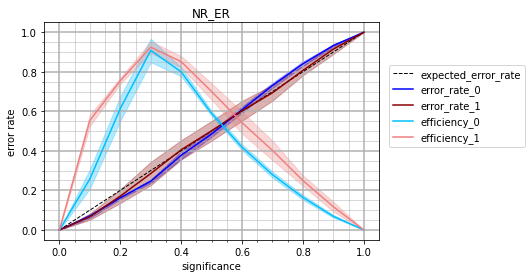

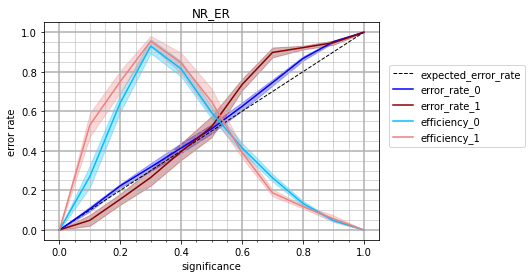

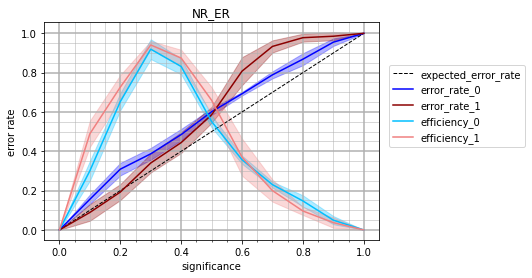

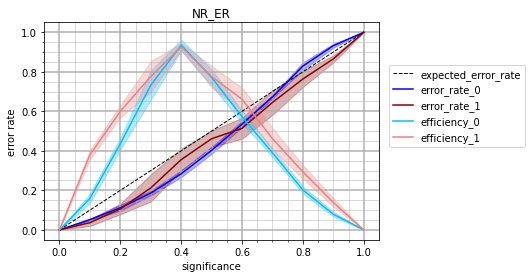

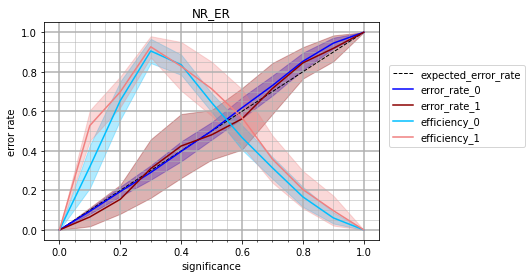

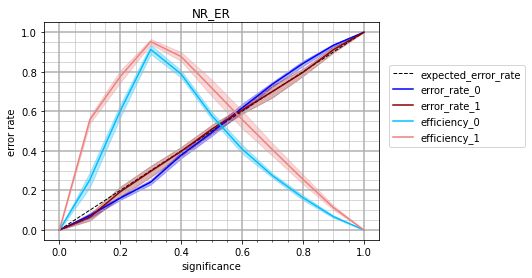

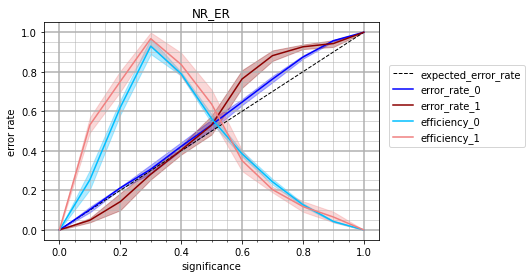

In [17]:
plots["cv"] = cross_validator.calibration_plot( averaged_evaluation_df=cross_validator.averaged_evaluation_df_cv,
            endpoint=endpoint,
        )
plots["pred_score"] = cross_validator.calibration_plot(
            averaged_evaluation_df=cross_validator.averaged_evaluation_df_pred_score,
            endpoint=endpoint,
        )
plots["pred_test"] = cross_validator.calibration_plot(
            averaged_evaluation_df=cross_validator.averaged_evaluation_df_pred_test,
            endpoint=endpoint,
        )
plots["cal_update"] = cross_validator.calibration_plot(
            averaged_evaluation_df=cross_validator.averaged_evaluation_df_pred_cal_update,
            endpoint=endpoint,
        )
plots["cal_update2"] = cross_validator.calibration_plot(
            averaged_evaluation_df=cross_validator.averaged_evaluation_df_pred_cal_update2,
            endpoint=endpoint,
        )
plots["train_update_cv"] = train_update_cross_validator.calibration_plot(
            averaged_evaluation_df=train_update_cross_validator.averaged_evaluation_df_cv,
            endpoint=endpoint,
        )
plots["train_update_pred_score"] = train_update_cross_validator.calibration_plot(
            averaged_evaluation_df=train_update_cross_validator.averaged_evaluation_df_pred_score,
            endpoint=endpoint,
        )